# FIRST ASSIGNMENT - BINARY CLASSIFICATION

### Project Goal

This project aims to compare the performance of various supervised learning methods on a binary classification problem, which will help you understand each classification algorithm's advantages and disadvantages.

### Steps

### 1. Indicate the imported packages/libraries

##### General Libraries

In [1]:
%matplotlib inline 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set() 
from sklearn.metrics import ConfusionMatrixDisplay 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline, make_pipeline 

##### Libraries for building LogisticsRegression

In [2]:
from sklearn.linear_model import LinearRegression, LogisticRegression 

##### Libraries for Decision Tree

In [3]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.utils.validation import check_is_fitted

##### Libraries for Random Forest

In [4]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

### 2. Load the dataset and print the data information

In [5]:
def load_data(file_path):
    data = pd.read_csv(file_path)
    
    return data

In [6]:
file_path = "dataset_assignment1.csv"
data = load_data(file_path)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   feature1  700 non-null    int64
 1   feature2  700 non-null    int64
 2   feature3  700 non-null    int64
 3   feature4  700 non-null    int64
 4   feature5  700 non-null    int64
 5   feature6  700 non-null    int64
 6   feature7  700 non-null    int64
 7   feature8  700 non-null    int64
 8   featue9   700 non-null    int64
 9   class     700 non-null    int64
dtypes: int64(10)
memory usage: 54.8 KB


### 3. Understand the dataset

In [8]:
# Examine the features
print("Features:", list(data.columns))

Features: ['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'featue9', 'class']


In [9]:
# Check for missing data
print("Number of missing values:", data.isnull().sum().sum())

Number of missing values: 0


In [10]:
# See view column elements
for col in data.columns:
    print(col, data[col].unique())

feature1 [ 5  3  6  4  8  1  2  7 10  9]
feature2 [ 1  4  8 10  2  3  7  5  6  9]
feature3 [ 1  4  8 10  2  3  5  6  7  9]
feature4 [ 1  5  3  8 10  4  6  2  9  7]
feature5 [ 2  7  3  1  6  4  5  8 10  9]
feature6 [ 1 10  2  4  3  9  7  5  8  6]
feature7 [ 3  9  1  2  4  5  7  8  6 10]
feature8 [ 1  2  7  4  5  3 10  6  9  8]
featue9 [ 1  5  4  2  3  7 10  8  6]
class [0 1]


##### i. Print out the number of samples for each class in the dataset

In [11]:
# Value count of the class label
data["class"].value_counts()

0    459
1    241
Name: class, dtype: int64

##### ii. Plot some figures to visualize the dataset (e.g., histogram, etc.)

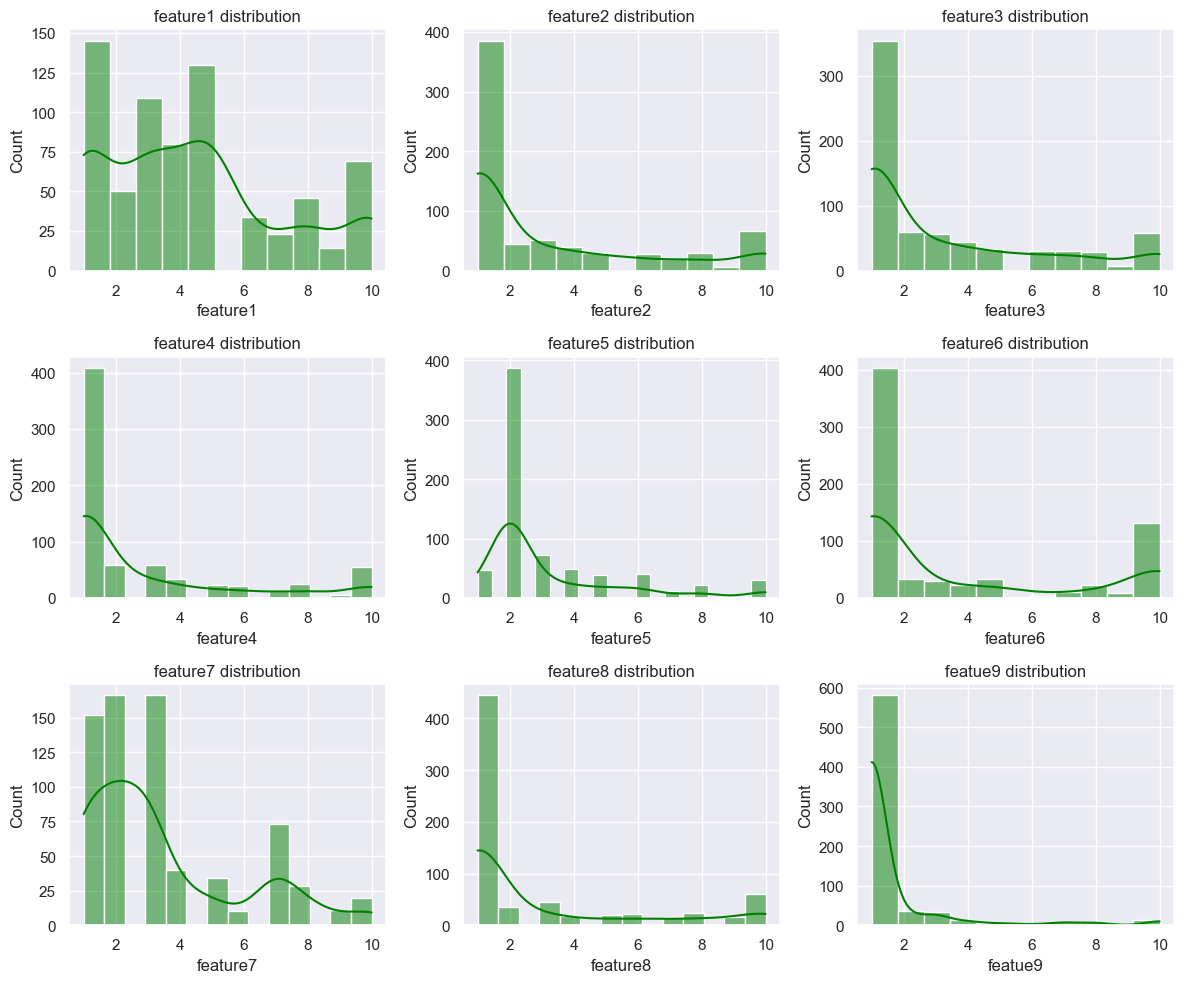

In [12]:
# Visualize all features
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))
axs = axs.flatten()

for i, feature in enumerate(data.columns[:-1]):
    sns.histplot(data[feature], kde=True, color='green', ax=axs[i])
    axs[i].set_title(f'{feature} distribution')

plt.tight_layout()
plt.show()

##### iii. For each class, print out the statistical description of features (e.g., the input variable x), such as mean, std, max and min values, etc.

In [13]:
# Group the data by class
grouped_data = data.groupby('class')

# Loop through each group and print the statistical description of features
for name, group in grouped_data:
    print(f'Statistical description of features for class {name}:')
    print(group.drop(columns=['class']).describe())
    print()

Statistical description of features for class 0:
         feature1    feature2    feature3    feature4    feature5    feature6  \
count  459.000000  459.000000  459.000000  459.000000  459.000000  459.000000   
mean     2.956427    1.324619    1.442266    1.363834    2.119826    1.437908   
std      1.672490    0.906830    0.996960    0.995886    0.916145    1.310839   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      1.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
50%      3.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
75%      4.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
max      8.000000    9.000000    8.000000   10.000000   10.000000   10.000000   

         feature7    feature8     featue9  
count  459.000000  459.000000  459.000000  
mean     2.102397    1.289760    1.063181  
std      1.079976    1.057787    0.501456  
min      1.000000    1.000000    1.000000  
2

##### iv. Further data exploration

a. Since our model will be a type of linear model, we need to make sure there's no issue with multicollinearity in our dataset.

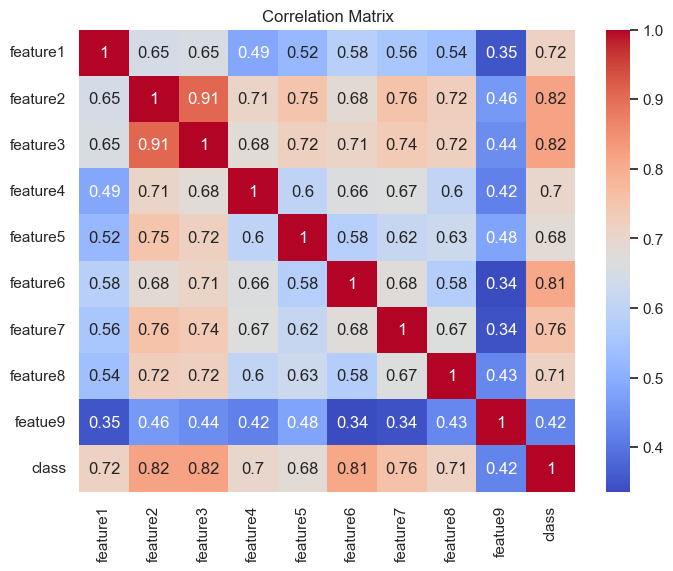

In [14]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

feature2 and feature3 has a very high correlation of 91% so we need to drop one of each, and nee to conside the feature correlation with the class label. feature 3 has possitive correlation (0.819) with the class while feature2 has possitive correlation (0.818) with the class labe, so we drop the feature with the lowest correlation between the two feature.

b. Use seaborn to create a boxplot that shows the distributions of the higher correlated features for both groups in the respective class.

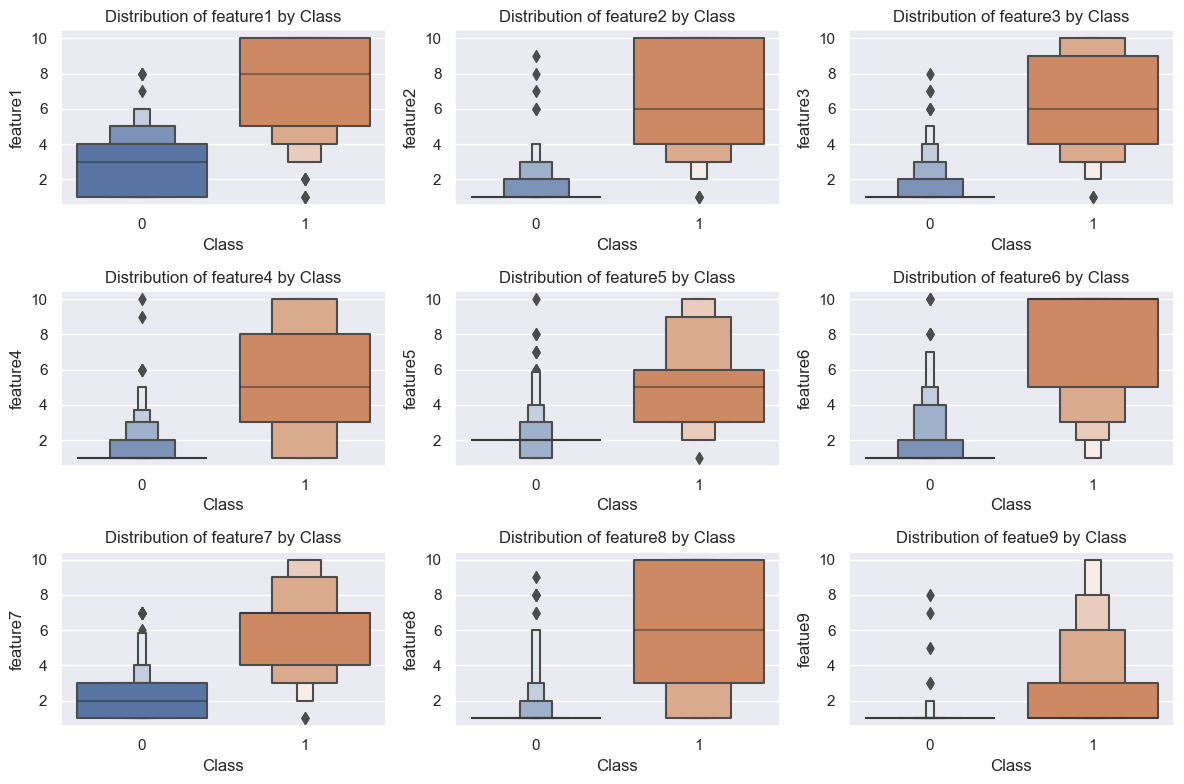

In [15]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))

# Create boxplots for each feature and class combination
for i, feature in enumerate(['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'featue9']):
    row = i // 3
    col = i % 3
    sns.boxenplot(x="class", y=feature, data=data, ax=axes[row, col])
    axes[row, col].set_xlabel("Class")
    axes[row, col].set_ylabel(feature)
    axes[row, col].set_title(f"Distribution of {feature} by Class")

plt.tight_layout()
plt.show()


We see that there is noticable difference between the elements of different features based on their various classes

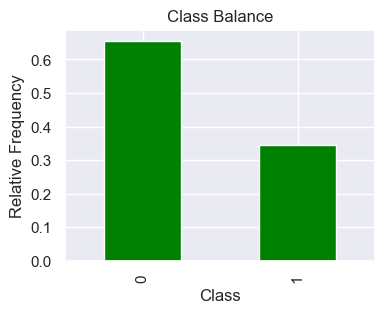

In [16]:
# Before we build our model, let's see if we can identify any obvious differences between classes
data["class"].value_counts(normalize=True).plot(
    kind="bar", 
    xlabel="Class",
    ylabel="Relative Frequency",
    color='green',
    title="Class Balance", 
    figsize = (4,3)
);

c. Analysing relationship between the class and the features

In [17]:
majority_class_prop, minority_class_prop = data["class"].value_counts(normalize=True)
print(f"Majority Class: {majority_class_prop}, Minority Class: {minority_class_prop}")

Majority Class: 0.6557142857142857, Minority Class: 0.3442857142857143


We see thet class 0 is our majority class and class 1 is the minority class

From the feature visualisation, we see that the feature1 and feature7 has the highest variability, so we can analyse their relationship with the class groups

In [18]:
feature1_pivot = pd.pivot_table(
    data, index="feature1", values="class", aggfunc=np.mean
).sort_values(by="class")
feature1_pivot

,class
feature1,
1,0.020690
2,0.080000
3,0.110092
4,0.150000
5,0.346154
6,0.529412
8,0.913043
7,0.956522
9,1.000000


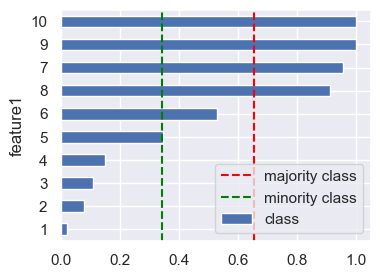

In [19]:
# Plot bar chart of `foundation_pivot`
feature1_pivot.plot(kind="barh", figsize = (4,3))
plt.axvline(
    majority_class_prop, linestyle="--", color = "red", label="majority class"
)
plt.axvline(
    minority_class_prop, linestyle="--", color = "green", label="minority class"
)
plt.legend(loc="lower right");

From the above chart we can see that the feature elements, greater that 7 are classified in the o class, while feature elements less than 7 are classified as class 1 for the feature1

In [20]:
feature7_pivot = pd.pivot_table(
    data, index="feature7", values="class", aggfunc=np.mean
).sort_values(by="class")
feature7_pivot

,class
feature7,
1,0.013158
2,0.042169
3,0.216867
4,0.800000
5,0.882353
6,0.900000
7,0.904110
8,1.000000
9,1.000000


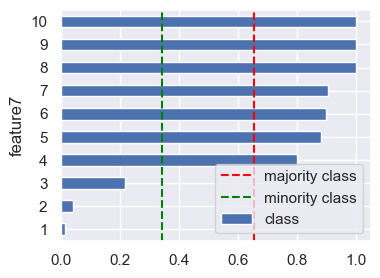

In [21]:
# Plot bar chart of `foundation_pivot`
feature7_pivot.plot(kind="barh", figsize = (4,3))
plt.axvline(
    majority_class_prop, linestyle="--", color = "red", label="majority class"
)
plt.axvline(
    minority_class_prop, linestyle="--", color = "green", label="minority class"
)
plt.legend(loc="lower right");

From the above chart we can see that the feature elements, greater that 4 are classified in the o class, while feature elements less than 4 are classified as class 1 for the feature7

### 4. Split data into a training dataset and a testing dataset (i.e., 80% v.s. 20

#### 1. Split

In [22]:
# Split the dataset into input features (X) and target variable (y)
target = "class"
X = data.drop(columns=target)
y = data[target]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_train shape:", X_val.shape)
print("y_train shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (448, 9)
y_train shape: (448,)
X_train shape: (112, 9)
y_train shape: (112,)
X_test shape: (140, 9)
y_test shape: (140,)


### 5. For each classification algorithm you chose, please complete the below steps in python:

#### A. Logistics Regression Model

##### i. Build Model

Baseline

In [24]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.65


Iterate

In [25]:
model = LogisticRegression(random_state=42)

In [26]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

In [27]:
# Perform K-Fold Cross Validation with k = 5 using GridSearchCV
cross_val = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
cross_val.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [28]:
# Build model
# model = LogisticRegression(max_iter=1000)
model = make_pipeline(
    LogisticRegression(max_iter=1000,
                       C=cross_val.best_params_['C'], 
                       penalty=cross_val.best_params_['penalty'], 
                       random_state=42
 )
)
# Fit model to training data
model.fit(X_train, y_train)

Pipeline(steps=[('logisticregression',
                 LogisticRegression(C=0.01, max_iter=1000, random_state=42))])

Evaluate

In [31]:
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_test = model.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 2))
print("Test Accuracy:", round(acc_test, 2))

Training Accuracy: 0.96
Test Accuracy: 0.96


In [33]:
model.predict(X_train)[:5]

array([0, 1, 0, 1, 0], dtype=int64)

In [34]:
y_train_pred_proba = model.predict_proba(X_train)
y_train_pred_proba[:5]

array([[0.9709117 , 0.0290883 ],
       [0.00815015, 0.99184985],
       [0.95335059, 0.04664941],
       [0.01104179, 0.98895821],
       [0.93703021, 0.06296979]])

In [35]:
model_pred = model.predict(X_test)

In [36]:
confusion_metrix = confusion_matrix(y_test, model_pred)
confusion_metrix

array([[93,  1],
       [ 4, 42]], dtype=int64)

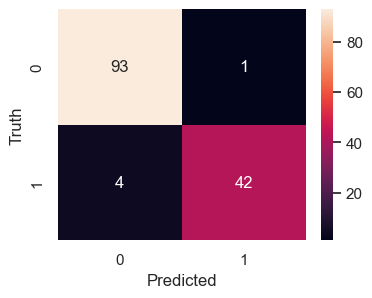

In [37]:
plt.figure(figsize = (4,3))
sns.heatmap(confusion_metrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth');

In [38]:
print("Test classification report")
print(classification_report(y_test,model_pred))

Test classification report
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        94
           1       0.98      0.91      0.94        46

    accuracy                           0.96       140
   macro avg       0.97      0.95      0.96       140
weighted avg       0.96      0.96      0.96       140



In [39]:
results = pd.DataFrame({'Actual value': y_test, "Predicted value": model_pred})
results.head(10)

,Actual value,Predicted value
158,0,0
500,0,0
396,0,0
155,1,1
321,0,0
212,0,0
234,0,0
289,1,1
300,1,1
356,1,0


##### ii. Communicate

In [40]:
importances = model.named_steps["logisticregression"].coef_[0]
features = X_train.columns

In [41]:
odds_ratios = pd.Series(np.exp(importances), index=features).sort_values()
odds_ratios

feature8    1.073307
featue9     1.085641
feature5    1.116101
feature4    1.125741
feature7    1.165170
feature2    1.178953
feature3    1.202026
feature1    1.290435
feature6    1.366392
dtype: float64

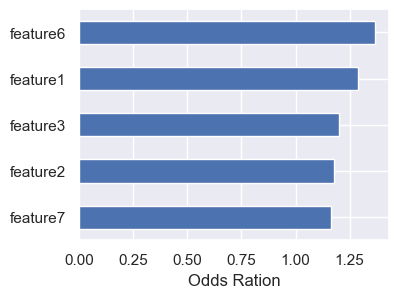

In [42]:
# Horizontal bar chart, five largest coefficients
odds_ratios.tail().plot(kind="barh", figsize = (4,3))
plt.xlabel("Odds Ration");

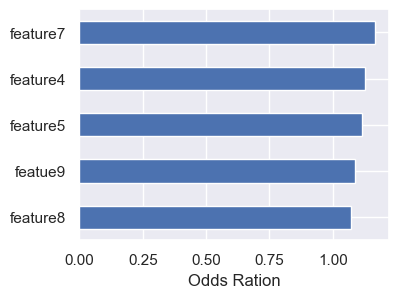

In [43]:
odds_ratios.head().plot(kind="barh", figsize = (4,3))
plt.xlabel("Odds Ration");

#### B. Decision Tree Model

##### i. Build Model

Baseline

In [44]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Our Baseline Accuracy Remains:", round(acc_baseline, 2))

Our Baseline Accuracy Remains: 0.65


Iterate

In [45]:
# Build Decision Tree Model
model = make_pipeline(
    DecisionTreeClassifier(max_depth=4, random_state=42)
)
# Fit model to training data
model.fit(X_train, y_train)

Pipeline(steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=4, random_state=42))])

In [46]:
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_val = model.score(X_val, y_val)

print("Training Accuracy:", round(acc_train, 2))
print("Validation Accuracy:", round(acc_val, 2))

Training Accuracy: 0.98
Validation Accuracy: 0.95


In [47]:
tree_depth = model.named_steps["decisiontreeclassifier"].get_depth()
print("Tree Depth:", tree_depth)

Tree Depth: 4


In [48]:
depth_hyperparams = range(1, 10, 1)

In [49]:
# Create empty lists for training and validation accuracy scores
training_acc = []
validation_acc = []

for d in depth_hyperparams:
    # Create model with `max_depth` of `d`
    test_model = make_pipeline(
        DecisionTreeClassifier(max_depth=d, random_state=42)
    )
    # Fit model to training data
    test_model.fit(X_train, y_train)
    # Calculate training accuracy score and append to `training_acc`
    training_acc.append(test_model.score(X_train, y_train))
    # Calculate validation accuracy score and append to `training_acc`
    validation_acc.append(test_model.score(X_val, y_val))

print("Training Accuracy Scores:", training_acc[:3])
print("Validation Accuracy Scores:", validation_acc[:3])

Training Accuracy Scores: [0.9308035714285714, 0.9642857142857143, 0.9642857142857143]
Validation Accuracy Scores: [0.9017857142857143, 0.9285714285714286, 0.9285714285714286]


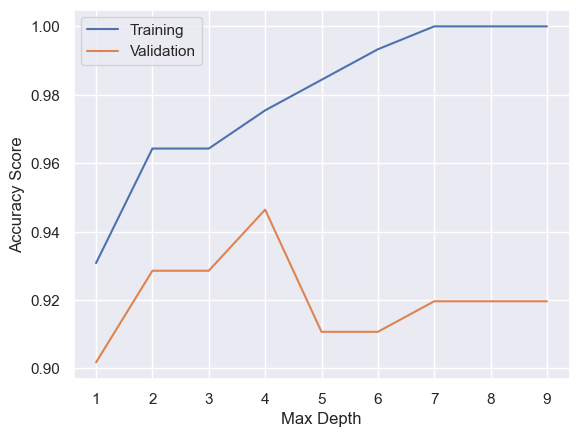

In [50]:
# Plot `depth_hyperparams`, `training_acc`
plt.plot(depth_hyperparams, training_acc, label="Training")
plt.plot(depth_hyperparams, validation_acc, label="Validation")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.legend();

Evaluate

In [51]:
test_acc = model.score(X_test, y_test)
print("Test Accuracy:", round(test_acc, 2))

Test Accuracy: 0.94


In [52]:
model_pred = model.predict(X_test)

In [53]:
confusion_metrix = confusion_matrix(y_test, model_pred)
confusion_metrix

array([[89,  5],
       [ 3, 43]], dtype=int64)

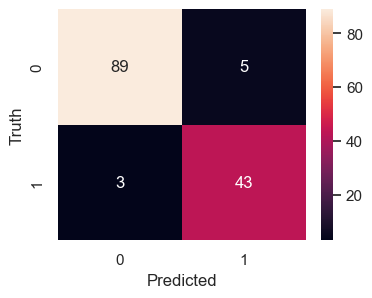

In [54]:
plt.figure(figsize = (4,3))
sns.heatmap(confusion_metrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth');

In [55]:
print("Test classification report")
print(classification_report(y_test,model_pred))

Test classification report
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        94
           1       0.90      0.93      0.91        46

    accuracy                           0.94       140
   macro avg       0.93      0.94      0.94       140
weighted avg       0.94      0.94      0.94       140



In [56]:
results = pd.DataFrame({'Actual value': y_test, "Predicted value": model_pred})
results.head(10)

,Actual value,Predicted value
158,0,0
500,0,0
396,0,0
155,1,1
321,0,1
212,0,0
234,0,0
289,1,1
300,1,1
356,1,1


##### ii. Communicate

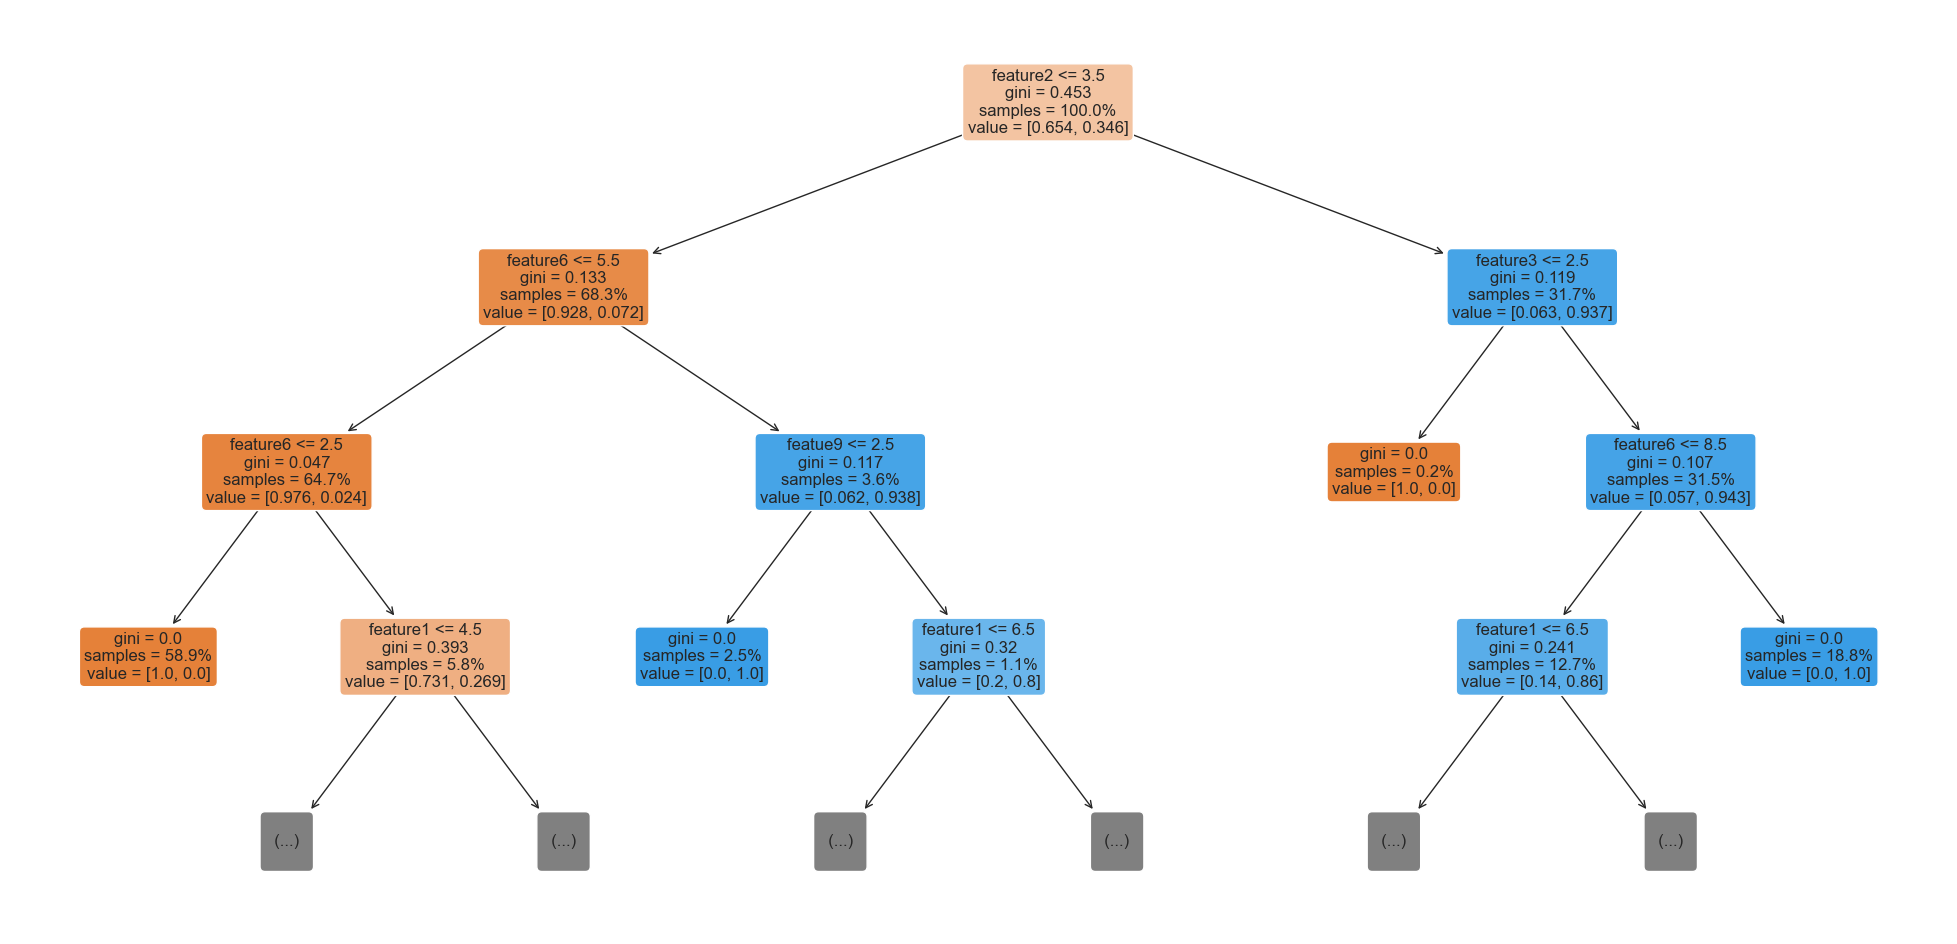

In [57]:
# Create larger figure
fig, ax = plt.subplots(figsize=(25, 12))
# Plot tree
plot_tree(
    decision_tree=model.named_steps["decisiontreeclassifier"],
    feature_names=X_train.columns,
    filled=True,  # Color leaf with class
    rounded=True,  # Round leaf edges
    proportion=True,  # Display proportion of classes in leaf
    max_depth=3,  # Only display first 3 levels
    fontsize=12,  # Enlarge font
    ax=ax,  # Place in figure axis
);

In [58]:
features = X_train.columns
importances = model.named_steps["decisiontreeclassifier"].feature_importances_

print("Features:", features[:3])
print("Importances:", importances[:3])

Features: Index(['feature1', 'feature2', 'feature3'], dtype='object')
Importances: [0.04842699 0.77909889 0.00949077]


In [59]:
feat_imp = pd.Series(importances, index=features).sort_values()
feat_imp.head()

feature4    0.000000
feature5    0.000000
feature7    0.000000
feature8    0.000000
featue9     0.001477
dtype: float64

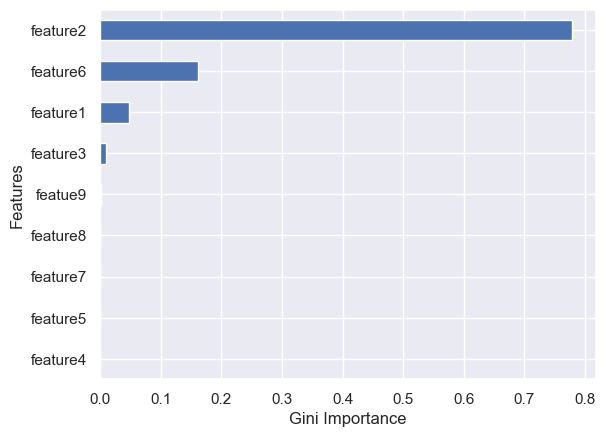

In [60]:
# Create horizontal bar chart
feat_imp.plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Features");

#### B. Random Forest

##### i. Build Model

Resample

In [61]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print("X_train_over shape:", X_train_over.shape)
X_train_over.head()

X_train_over shape: (586, 9)


,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,featue9
0,3,1,2,1,2,1,3,1,1
1,10,8,7,4,3,10,7,9,1
2,5,2,1,1,2,1,3,1,1
3,10,5,8,10,3,10,5,1,3
4,6,2,3,1,2,1,1,1,1


Baseline

In [62]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.654


Iterate

In [63]:
clf = make_pipeline(SimpleImputer(), RandomForestClassifier(random_state=42))
print(clf)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])


In [64]:
cv_acc_scores = cross_val_score(clf, X_train_over, y_train_over, cv=5, n_jobs=-1)
print(cv_acc_scores)

[0.97457627 0.96581197 0.95726496 0.99145299 0.98290598]


In [65]:
params = {
    "simpleimputer__strategy": ["mean", "median"],
    "randomforestclassifier__n_estimators": range(25, 100, 25), 
    "randomforestclassifier__max_depth": range(10, 50, 10)
}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'randomforestclassifier__n_estimators': range(25, 100, 25),
 'randomforestclassifier__max_depth': range(10, 50, 10)}

In [66]:
model = GridSearchCV(
    clf,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)
model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [68]:
# Train model
model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [69]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.175682,0.032567,0.021126,0.006940,10,25,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.966102,0.965812,0.957265,0.991453,0.982906,0.972708,0.012530,9
1,0.134413,0.005350,0.012051,0.003778,10,25,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.966102,0.965812,0.957265,0.991453,0.982906,0.972708,0.012530,9
2,0.262364,0.030267,0.021969,0.003126,10,50,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.974576,0.965812,0.957265,0.991453,0.982906,0.974402,0.012088,1
3,0.280825,0.032659,0.024912,0.002831,10,50,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.974576,0.965812,0.957265,0.991453,0.982906,0.974402,0.012088,1
4,0.408238,0.042780,0.037892,0.005973,10,75,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.974576,0.965812,0.957265,0.982906,0.982906,0.972693,0.009975,17


In [70]:
cv_results["param_randomforestclassifier__max_depth"] == 10

0      True
1      True
2      True
3      True
4      True
5      True
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
Name: param_randomforestclassifier__max_depth, dtype: bool

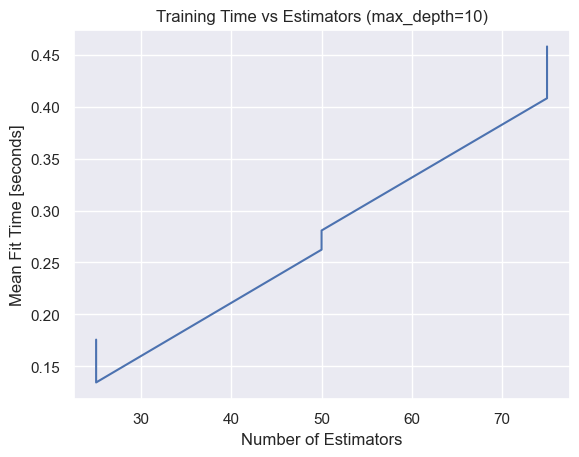

In [71]:
# Create mask
mask = cv_results["param_randomforestclassifier__max_depth"] == 10
# Plot fit time vs n_estimators
plt.plot(
    cv_results[mask]["param_randomforestclassifier__n_estimators"],
    cv_results[mask]["mean_fit_time"]
)
# Label axes
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Estimators (max_depth=10)");

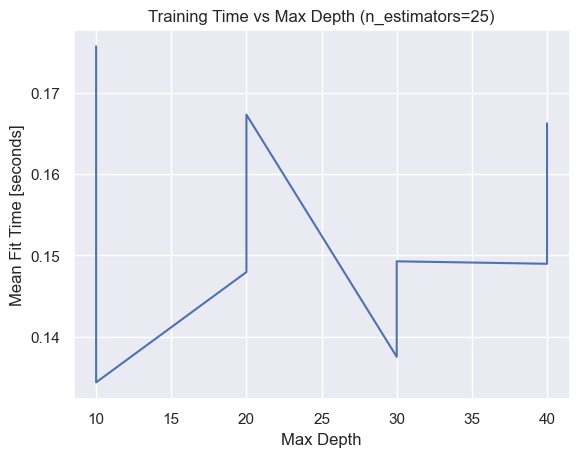

In [72]:
# Create mask
mask = cv_results["param_randomforestclassifier__n_estimators"] == 25
# Plot fit time vs max_depth
plt.plot(
    cv_results[mask]["param_randomforestclassifier__max_depth"],
    cv_results[mask]["mean_fit_time"]
)
# Label axes
plt.xlabel("Max Depth")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Max Depth (n_estimators=25)");

In [73]:
# Extract best hyperparameters
model.best_params_

{'randomforestclassifier__max_depth': 10,
 'randomforestclassifier__n_estimators': 50,
 'simpleimputer__strategy': 'mean'}

Evaluate

In [74]:
acc_train = model.score(X_train, y_train)
acc_test = model.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9643


In [75]:
y_test.value_counts()

0    94
1    46
Name: class, dtype: int64

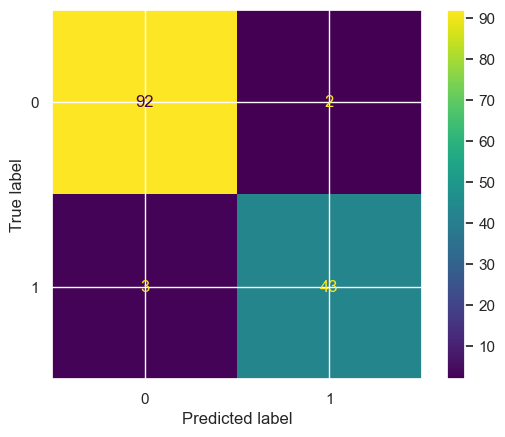

In [76]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

##### ii. Communicate

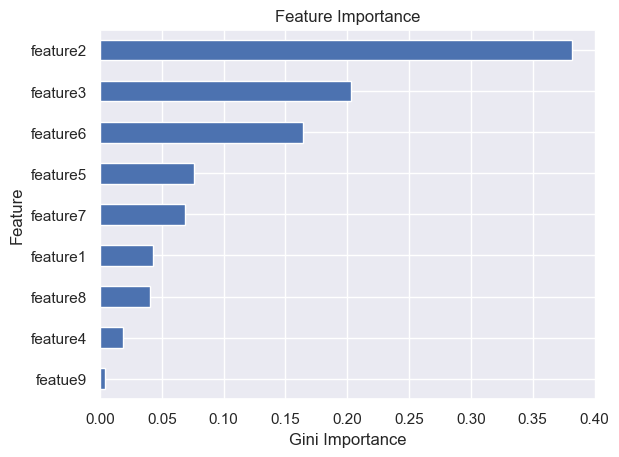

In [77]:
# Get feature names from training data
features = X_train_over.columns

# Extract importances from model
importances = model.best_estimator_.named_steps[
    "randomforestclassifier"
].feature_importances_

# Create a series with feature names and importances
feat_imp = pd.Series(importances, index=features).sort_values()

# Plot 10 most important features
feat_imp.tail(10).plot(kind="barh")

plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");